# Plotting with Loss Rider

Lets take some normal looking plots, and see how to generate them using Loss Rider! 

We will source example data from [this paper about u-µP](https://arxiv.org/abs/2407.17465).

__If you are viewing this notebook on the web / can't run it, you can instead experience the joy of riding loss curves by downloading the .json files in the `./maps` folder and opening them on `www.linerider.com`.__

## Example 1
These loss curves show that using u-µP you can train a Transformer in naive FP8, unlike µP where the FP8 model diverges.

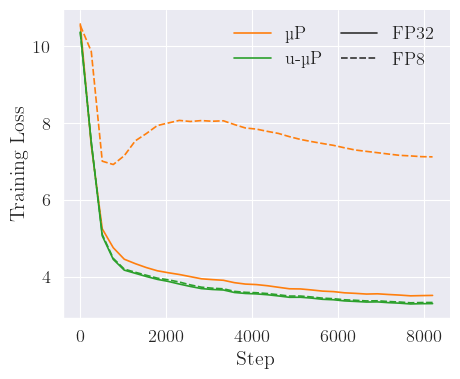

### But which method is better for a little man on a sled?

In [4]:
import pandas as pd
from lossrider import lossrider

df = pd.read_csv("./_data/fp8_df.csv")

lossrider(
    df=df[(df.model_type == 'u-µP') & (df.type == 'FP8')],
    x="Training Step",
    y="Training Loss",
    width=3000, height=1300,
    xlim=(-200, 8200), ylim=(2.7, 11),
    xticks=range(0, 8001, 1000), yticks=range(3, 10),
    logy=True, fontsize=75,
    outfile='maps/loss_curve',
)

# This should open linerider.com in an embedded iframe, in which you can 
# load the file 'plots/loss_curve.json' created above.

# Try changing the df filter form 'u-µP' to 'µP' above to compare the 
# maps generated for each method

## Width transfer
This plot shows that sweeping hyperparameters is more efficient using u-µP.

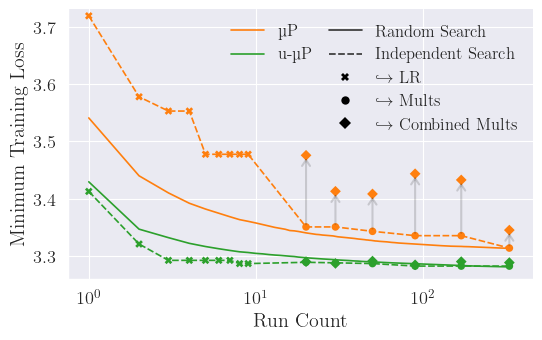

But what if we really want to feel it? 

The below example shows that Loss Rider uses a _fairly_ seaborn-like interface to support multiple riders on multiple colours of line, and can generate a helpful legend :)

In [5]:
df = pd.read_csv("./_data/sweep_df.csv")

lossrider(
    df[df.sweep == 'Independent Search'],  # Select just two lines to plot
    x="Run Count", 
    y="Validation Loss",
    hue="model_type",
    xlim=(0.6, 340), ylim=(3.2, 3.8),
    xticks=(1, 10, 100), 
    yticks=[x/10 for x in range(32, 39)],
    width=1000, height=500, fontsize=30,
    logx=True, grid=False,
    legend=True, legend_loc=(.65, 1),
    outfile='maps/sweep_strategies',
)

# TOP TIP:
# Try opening the Settings and changing 
# ⚙ Settings> General > Playback Preview
# or 
# ⚙ Settings > Riders > Playback Camera Focus

# Width Transfer

This plot shows that the hyperparameters swept on small u-µP modles can be transferred to larger models. Boring!

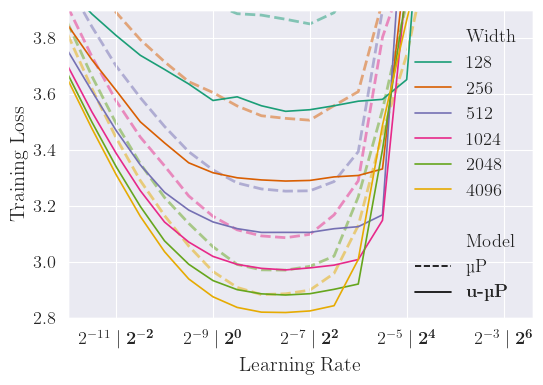




In [6]:
df = pd.read_csv("./_data/transfer_df.csv")

lossrider(
    df[df.Width < 4096],
    x="lr",
    y="Training Loss",
    hue="Width",
    width=2800, height=3200,
    xlim=(2**-3.5, 2**5.1), ylim=(2.79, 4.6),
    xticks=[2**e for e in range(-3, 6)],
    yticks=[x/10 for x in range(28, 45, 2)],
    xticklabels=['1/8', '1/4', '1/2', '1', '2', '4', '8', '16', '32'],
    xlabel="learning rate",
    logx=True, logy=True,
    legend=True, legend_loc=(1.05, 0.5), 
    label_fontsize=150, legend_fontsize=80,
    outfile='maps/width_transfer',
)

# TOP TIP:
# If you don't want to lose your playback settings every time you run the cell,
# you could open linerider.com in a browser and use that persistent window to 
# load the save files generated by the above.